In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D,Input,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.python.framework import ops
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
dir = "/content/drive/MyDrive/Colab Notebooks/PLD_3_Classes_256/Training"
x=[]
y=[]
for direct in os.listdir(dir):
    print("Loading dataset training {}".format(direct))
    for filename in os.listdir(os.path.join(dir,direct)):
        img_path = os.path.join(dir,direct,filename)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(32,32))
        image = np.array(image)
        image = image/255
        x.append(image)
        y.append(direct)

Loading dataset training Healthy
Loading dataset training Late_Blight
Loading dataset training Early_Blight


In [ ]:
dir_val = "/content/drive/MyDrive/Colab Notebooks/PLD_3_Classes_256/Validation"
x_val=[]
y_val=[]
for direct in os.listdir(dir_val):
    print("Loading dataset validation {}".format(direct))
    for filename in os.listdir(os.path.join(dir_val,direct)):
        img_path = os.path.join(dir_val,direct,filename)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(32,32))
        image = np.array(image)
        image = image/255
        x_val.append(image)
        y_val.append(direct)

Loading dataset validation Early_Blight
Loading dataset validation Late_Blight
Loading dataset validation Healthy


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
le = LabelEncoder()
int_labels = le.fit_transform(y)
encode_label = np_utils.to_categorical(int_labels)

In [ ]:
print(int_labels)

[1 1 1 ... 0 0 0]


In [ ]:
print(encode_label)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
le = LabelEncoder()
int_labels = le.fit_transform(y_val)
encode_label_val = np_utils.to_categorical(int_labels)

In [ ]:
x = np.array(x)

In [ ]:
x_val = np.array(x_val)

In [ ]:
from sklearn.utils import shuffle
x,encode_label = shuffle(x,encode_label)
x_val,encode_label_val = shuffle(x_val,encode_label_val)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,encode_label,test_size=0.2)

In [ ]:
Y_train = np.array([np.array(i) for i in Y_train])
Y_test = np.array([np.array(i) for i in Y_test])
encode_label_val = np.array([np.array(i) for i in encode_label_val])

In [ ]:
print(Y_train)

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
ops.reset_default_graph()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dropout (Dropout)           (None, 16384)             0

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath = 'my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

In [ ]:
history=model.fit(X_train,Y_train,validation_data=(x_val,encode_label_val),batch_size=32,epochs=10,callbacks=callbacks)

Epoch 1/10
82/82 [==============================] - ETA: 0s - loss: 1.1841 - accuracy: 0.5598
Epoch 1: val_loss improved from inf to 1.06461, saving model to my_best_model.hdf5
82/82 [==============================] - 16s 168ms/step - loss: 1.1841 - accuracy: 0.5598 - val_loss: 1.0646 - val_accuracy: 0.4375
Epoch 2/10
82/82 [==============================] - ETA: 0s - loss: 0.6736 - accuracy: 0.7082
Epoch 2: val_loss improved from 1.06461 to 0.98829, saving model to my_best_model.hdf5
82/82 [==============================] - 14s 169ms/step - loss: 0.6736 - accuracy: 0.7082 - val_loss: 0.9883 - val_accuracy: 0.5553
Epoch 3/10
82/82 [==============================] - ETA: 0s - loss: 0.4876 - accuracy: 0.8021
Epoch 3: val_loss improved from 0.98829 to 0.90219, saving model to my_best_model.hdf5
82/82 [==============================] - 13s 158ms/step - loss: 0.4876 - accuracy: 0.8021 - val_loss: 0.9022 - val_accuracy: 0.6442
Epoch 4/10
82/82 [==============================] - ETA: 0s - los

In [ ]:
model.save("my_model")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


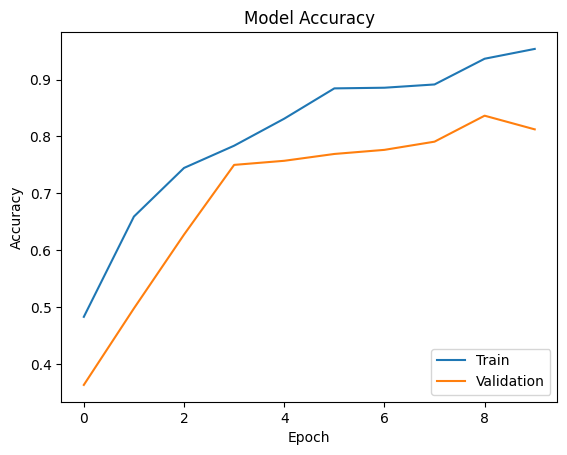

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

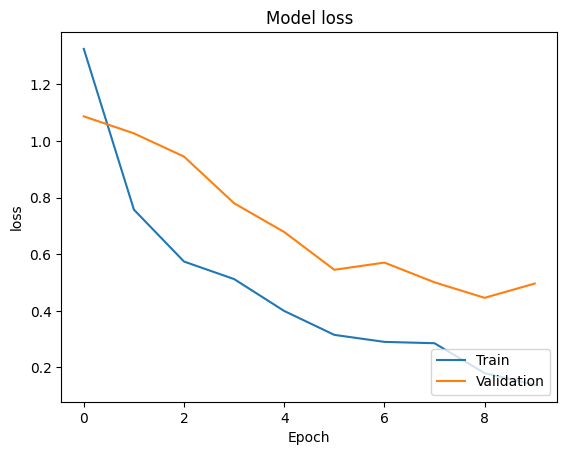

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

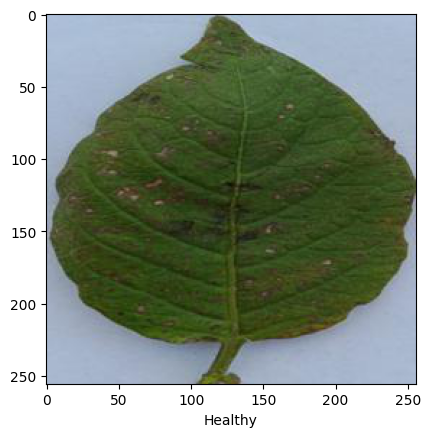

In [ ]:
import matplotlib.image as mping
test_img_path = "/content/drive/MyDrive/Colab Notebooks/PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_103.jpg"
img = mping.imread(test_img_path)
imgplot = plt.imshow(img)
plt.xlabel("Healthy")
plt.show()

In [ ]:
test_arr = []
test_image = cv2.imread(test_img_path)
test_image = cv2.resize(test_image,(32,32))
test_image = np.array(test_image)
test_image = test_image/255
test_image = test_image.reshape(1,32,32,3)
test_arr.append(test_image)

In [ ]:
print(test_arr)

[array([[[[0.85098039, 0.74901961, 0.68235294],
         [0.84705882, 0.74509804, 0.67843137],
         [0.84705882, 0.74901961, 0.67058824],
         ...,
         [0.84705882, 0.74901961, 0.68627451],
         [0.84313725, 0.74509804, 0.68235294],
         [0.84705882, 0.74901961, 0.68627451]],

        [[0.84313725, 0.74117647, 0.6745098 ],
         [0.83921569, 0.7372549 , 0.67058824],
         [0.83921569, 0.74117647, 0.6627451 ],
         ...,
         [0.83529412, 0.7372549 , 0.6745098 ],
         [0.83529412, 0.7372549 , 0.6745098 ],
         [0.83529412, 0.7372549 , 0.6745098 ]],

        [[0.84313725, 0.74901961, 0.67843137],
         [0.84313725, 0.74901961, 0.67843137],
         [0.84313725, 0.74901961, 0.67843137],
         ...,
         [0.81568627, 0.7254902 , 0.6627451 ],
         [0.82352941, 0.73333333, 0.67058824],
         [0.82352941, 0.73333333, 0.67058824]],

        ...,

        [[0.80784314, 0.71764706, 0.65882353],
         [0.81176471, 0.72156863, 0.6627451 

In [ ]:
output=model.predict(test_arr)
model.predict(test_arr) #From this we can conclude that the prediction shows the leaf hash Late Blight disease!!

1/1 [==============================] - 0s 55ms/step


array([[0.9843663 , 0.00537132, 0.01026249]], dtype=float32)

In [ ]:
output_str = ["{:.6f}".format(prob) for prob in output.flatten()]
output_str = ", ".join(output_str)
print("[{}]".format(output_str))

[0.984366, 0.005371, 0.010262]
